In [1]:
!pip install -U scikit-learn

In [2]:
from sklearn.neighbors import KNeighborsClassifier 
import pandas as pd
import numpy as np
df=pd.read_csv("C:/Projects/Ration/Python/Final.csv")

In [3]:
print(df.head())

   ID  District  Employment  Number Of Family Members  Income   Card Type
0   1  Ariyalur           0                         2       1  Sugar Card
1   1  Ariyalur           0                         2       2    AAY Card
2   1  Ariyalur           0                         3       0   Rice Card
3   1  Ariyalur           0                         3       1   Rice Card
4   1  Ariyalur           0                         3       2    AAY Card


In [4]:
print(df.tail())

     ID     District  Employment  Number Of Family Members  Income  \
630   1     Ariyalur           1                         1       1   
631   1     Ariyalur           0                         3       3   
632   9  Kanchipuram           0                         4       2   
633   9  Kanchipuram           0                         4       2   
634  19   Pudukottai           0                         2       2   

       Card Type  
630  Police Card  
631     AAY Card  
632     AAY Card  
633     AAY Card  
634     AAY Card  


In [5]:
df.columns

Index(['ID', 'District', 'Employment', 'Number Of Family Members', 'Income',
       'Card Type'],
      dtype='object')

In [6]:
df.shape

(635, 6)

In [7]:
df.set_index("District", inplace = True)

In [8]:
print(df)

             ID  Employment  Number Of Family Members  Income    Card Type
District                                                                  
Ariyalur      1           0                         2       1   Sugar Card
Ariyalur      1           0                         2       2     AAY Card
Ariyalur      1           0                         3       0    Rice Card
Ariyalur      1           0                         3       1    Rice Card
Ariyalur      1           0                         3       2     AAY Card
...          ..         ...                       ...     ...          ...
Ariyalur      1           1                         1       1  Police Card
Ariyalur      1           0                         3       3     AAY Card
Kanchipuram   9           0                         4       2     AAY Card
Kanchipuram   9           0                         4       2     AAY Card
Pudukottai   19           0                         2       2     AAY Card

[635 rows x 5 columns]


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 635 entries, Ariyalur to Pudukottai
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        635 non-null    int64 
 1   Employment                635 non-null    int64 
 2   Number Of Family Members  635 non-null    int64 
 3   Income                    635 non-null    int64 
 4   Card Type                 635 non-null    object
dtypes: int64(4), object(1)
memory usage: 29.8+ KB


In [10]:
df.describe()

,ID,Employment,Number Of Family Members,Income
count,635.000000,635.000000,635.000000,635.000000
mean,18.051969,0.327559,3.382677,2.211024
std,10.200458,0.469693,1.059737,1.210966
min,1.000000,0.000000,1.000000,0.000000
25%,9.000000,0.000000,3.000000,1.000000
50%,18.000000,0.000000,3.000000,2.000000
75%,27.000000,1.000000,4.000000,3.000000
max,36.000000,1.000000,5.000000,4.000000


In [11]:
df.shape

(635, 5)

In [12]:
df

,ID,Employment,Number Of Family Members,Income,Card Type
District,,,,,
Ariyalur,1,0,2,1,Sugar Card
Ariyalur,1,0,2,2,AAY Card
Ariyalur,1,0,3,0,Rice Card
Ariyalur,1,0,3,1,Rice Card
Ariyalur,1,0,3,2,AAY Card
...,...,...,...,...,...
Ariyalur,1,1,1,1,Police Card
Ariyalur,1,0,3,3,AAY Card
Kanchipuram,9,0,4,2,AAY Card


In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
df_model = df.copy()
scaler = StandardScaler()
features= [['ID','Employment','Number Of Family Members','Income']]
for feature in features:
    df_model[feature] = scaler.fit_transform(df_model[feature])

In [16]:
X = df[['ID','Employment','Number Of Family Members','Income']]
Y = df[['Card Type']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=7, stratify=Y)

In [17]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, Y_train)

print(knn.score(X_test, Y_test))


0.968503937007874


In [18]:
new_row=np.array([[19,0,2,2]])
df=df[df['Employment']==new_row[0][1]]

In [19]:
Y = df['Card Type'].values
X = df.drop('Card Type', axis=1).values

In [20]:
df.dropna(axis="columns", how="any", inplace=True)

In [21]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X, Y)

KNeighborsClassifier(n_neighbors=4)

In [22]:
Y_pred = knn.predict(X)


In [23]:
new_prediction = knn.predict(new_row)
print("Prediction: {}".format(new_prediction)) 

Prediction: ['AAY Card']


In [24]:
new=new_row.tolist()
# # print(new)
new[0].append(new_prediction[0])
# # print(new)
name=list(set(list(df[df['ID']==new[0][0]].index)))
new[0].insert(1,name[0])
# # print(new[0])

In [25]:
from csv import writer

with open("C:/Projects/Ration/Python/Final.csv", 'a') as f_object:

    writer_object = writer(f_object)

    writer_object.writerow(new[0])

    f_object.close()

In [26]:
import matplotlib.pyplot as plt

In [27]:
from sklearn.cluster import KMeans

for i in range(0,6): 
     kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
kmeans.fit(X)


KMeans(n_clusters=5, n_init=10, random_state=0)

In [28]:
kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(X)
X=df.iloc[:, [0,4]].values

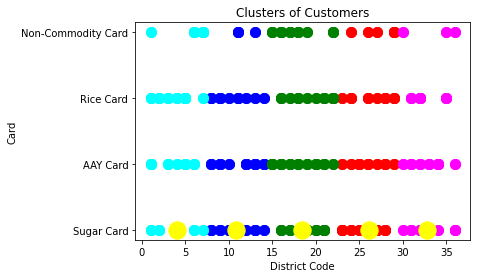

In [29]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('District Code')
plt.ylabel('Card')
plt.show()